# CryptoProphet
## Notebook's Goal
> Generate Technical Analysis KPI's to Bitcoin dataset.

In [1]:
# imports modules
from src.paths import LOCAL_RAW_DATA_PATH, LOCAL_PROCESSED_DATA_PATH, LOCAL_MODELS_PATH
import matplotlib.pyplot as plt
import pandas_ta as ta
import pandas as pd
import numpy as np
import xgboost
import pickle

plt.style.use('fivethirtyeight')

# loads data
df_path = LOCAL_RAW_DATA_PATH / 'btc-usd.csv'
df = pd.read_csv(df_path)
df.head(3).T

,0,1,2
date,2019-06-24 00:00:00,2019-06-24 01:00:00,2019-06-24 02:00:00
volume,0,6.76435e+07,2.48674e+07
low,10756.3,10559.9,10570.2
high,10888.3,10852.7,10702
open,10878.7,10852.7,10652.6
close,10856.3,10643.3,10649.1
ma_120_periods,NaN,NaN,NaN
ma_720_periods,NaN,NaN,NaN
ma_delta,NaN,NaN,NaN
ma_delta_norm,NaN,NaN,NaN


In [2]:
# generate valorization features (past and future)
# it calculates how much Bitcoin price changed within an amount `p` of periods (in this dataset 1 period = 1 hour)
# please see the results below to understand what happened!
from src.helpers import get_valorization
for p in [+24, +12, +6, +2, +1, -1, -2, -6, -12, -24, -24*2, -24*7, -24*15, -25*30]:
    val = get_valorization(df, periods=p)
    df[val.name] = val
df.head(3).T

,0,1,2
date,2019-06-24 00:00:00,2019-06-24 01:00:00,2019-06-24 02:00:00
volume,0,6.76435e+07,2.48674e+07
low,10756.3,10559.9,10570.2
high,10888.3,10852.7,10702
open,10878.7,10852.7,10652.6
close,10856.3,10643.3,10649.1
ma_120_periods,NaN,NaN,NaN
ma_720_periods,NaN,NaN,NaN
ma_delta,NaN,NaN,NaN
ma_delta_norm,NaN,NaN,NaN


In [4]:
# extracts day of the month (it might influence bitcoin price, who knows!)
df['day_of_month']=int(df['date'][0][8:10])
for i in range(17234):
    df['day_of_month'][i]=int(df['date'][i][8:10])

print(df['day_of_month'][0:-1])

c:\users\muril\.virtualenvs\crypto-prophet-ckjwbuny\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0        24
1        24
2        24
3        24
4        24
         ..
17229    12
17230    12
17231    12
17232    12
17233    12
Name: day_of_month, Length: 17234, dtype: int64


In [5]:
# defines a few functions to generate Technical Analysis KPI's
def SMA(data, period=30,column='close'):
    return data[column].rolling(window=period).mean()

def EMA(data, period=20,column='close'):
    return data[column].ewm(span=period, adjust=False).mean()

def MACD(data, period_long=26, period_short=12, period_signal=9,column='close'):
    ShortEMA=EMA(data, period_short, column=column)
    LongEMA=EMA(data, period_short, column=column)
    data['MACD']=ShortEMA-LongEMA
    data['Signal_line']=EMA(data, period_signal,column='MACD')
    return data

def RSI(data, period=30, column='close'):
    delta= data[column].diff(1)
    delta=delta[1:]
    up=delta.copy()
    down=delta.copy()
    up[up<0]=0
    down[down>0]=0
    data['up']=up
    data['down']=down
    AVG_Gain=SMA(data, period, column='up')
    AVG_Loss=abs(SMA(data, period,column='down'))
    RS= AVG_Gain/AVG_Loss
    RSI=100.0-(100.0/(1.0+RS))
    data['RSI']=RSI
    return data

In [6]:
# generate features
MACD(df)
RSI(df)
df['MSA']=SMA(df)
df['EMA']=EMA(df)

In [7]:
df.head(3).T

,0,1,2
date,2019-06-24 00:00:00,2019-06-24 01:00:00,2019-06-24 02:00:00
volume,0,6.76435e+07,2.48674e+07
low,10756.3,10559.9,10570.2
high,10888.3,10852.7,10702
open,10878.7,10852.7,10652.6
close,10856.3,10643.3,10649.1
ma_120_periods,NaN,NaN,NaN
ma_720_periods,NaN,NaN,NaN
ma_delta,NaN,NaN,NaN
ma_delta_norm,NaN,NaN,NaN


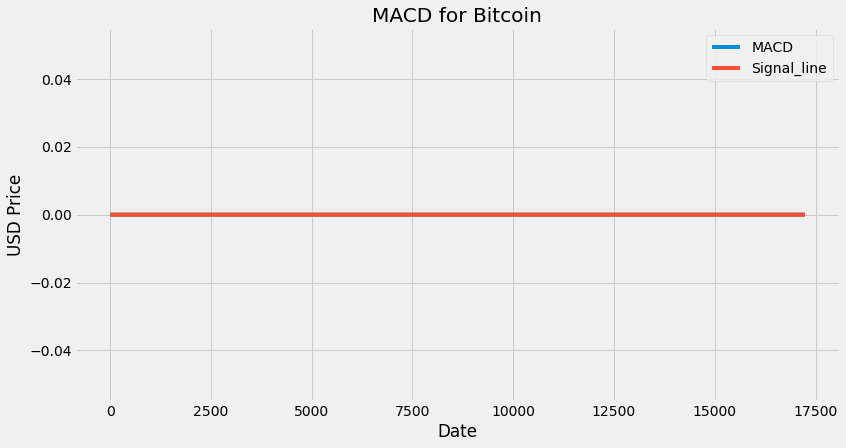

In [8]:
# there's something wrong with MACD ... if we have time we'll fix it!
column_list=['MACD','Signal_line']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('MACD for Bitcoin')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

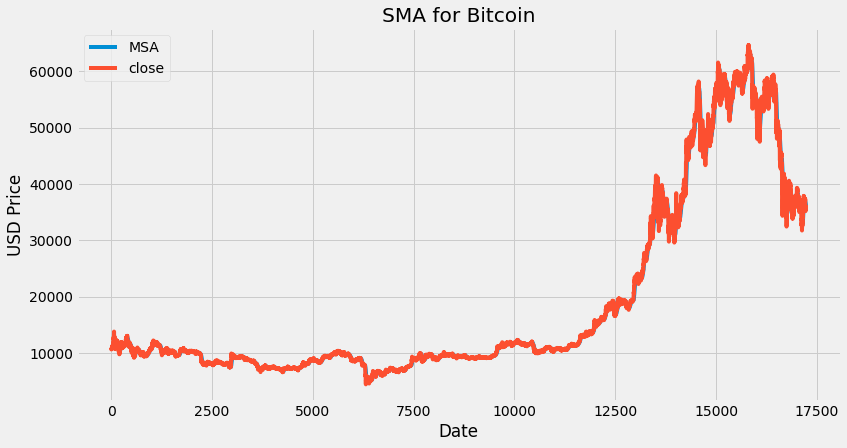

In [9]:
# plotting SMA!
column_list=['MSA','close']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('SMA for Bitcoin')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

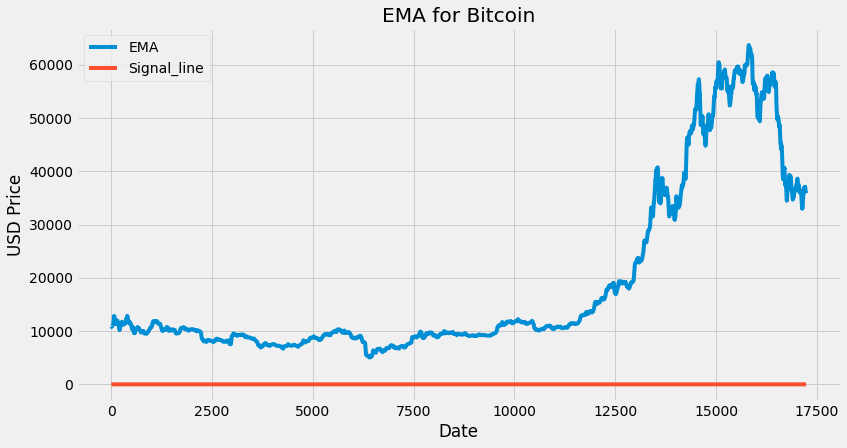

In [10]:
# plotting EMA!
column_list=['EMA','Signal_line']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('EMA for Bitcoin')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

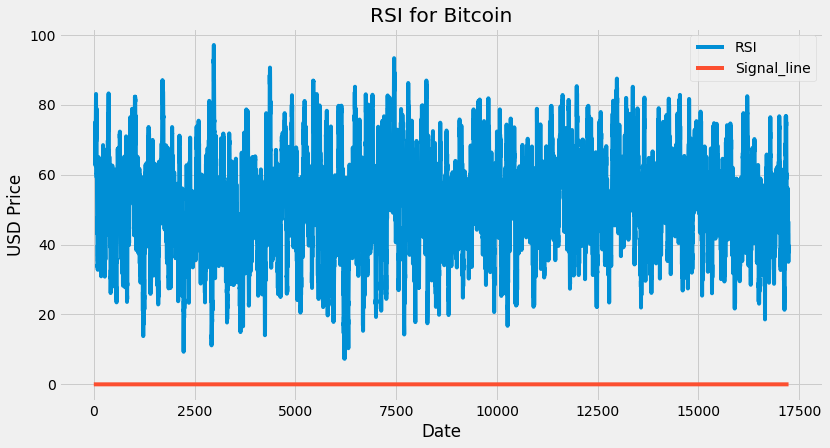

In [11]:
# plotting RSI
column_list=['RSI','Signal_line']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('RSI for Bitcoin')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()
# RSI above 70 sell
# RSI below 30 buy

In [12]:
# exports data
df.to_pickle(LOCAL_PROCESSED_DATA_PATH / 'btc-usd_featurized_ta.pkl')

# Conclusion
> Technical Analysis KPI's generated overall properly.
> 
> `Signal_line` and `MACD` should be revised if there's enough time.